## Atividade task-06-regularization-01

Aluna: Fabiana de Albuquerque Silva

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

### Versão TensorFlow:

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Versão PyTorch:

In [2]:
# Versão PyTorch:

import torch
from torchvision import datasets, transforms
import numpy as np

# Carregando MNIST com torchvision
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root=".", train=True, download=True, transform=transform)
train_images = train_dataset.data.view(-1, 28 * 28).float().numpy() / 255
train_labels = train_dataset.targets.numpy()

# Adicionando canais de ruído e zeros
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1
)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 38.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.23MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.6MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.26MB/s]


**Training the same model on MNIST data with noise channels or all-zero channels**

### Versão Tensorflow:

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.6957 - loss: 1.0900 - val_accuracy: 0.9112 - val_loss: 0.3001
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9153 - loss: 0.2824 - val_accuracy: 0.9445 - val_loss: 0.1899
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9458 - loss: 0.1783 - val_accuracy: 0.9463 - val_loss: 0.1721
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9628 - loss: 0.1186 - val_accuracy: 0.9463 - val_loss: 0.1731
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9745 - loss: 0.0842 - val_accuracy: 0.9555 - val_loss: 0.1503
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9801 - loss: 0.0624 - val_accuracy: 0.9673 - val_loss: 0.1151
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9862 - loss: 0.0452 - val_accuracy: 0.9637 - val_loss: 0.1368
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9897 - loss: 0.0332 - val_

### Versão PyTorch:

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(784 * 2, 512)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def train_model(X, y, epochs=10, batch_size=128):
    model = SimpleMLP()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.RMSprop(model.parameters())

    dataset = TensorDataset(torch.tensor(X, dtype=torch.float32),
                            torch.tensor(y, dtype=torch.long))
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        correct = 0
        total = 0
        for batch_X, batch_y in dataloader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += batch_y.size(0)
            correct += (predicted == batch_y).sum().item()
        print(f"Epoch {epoch+1}/{epochs} - Loss: {total_loss:.4f}, Accuracy: {correct / total:.4f}")
    return model

# Treinamento com canais de ruído
model_noise = train_model(train_images_with_noise_channels, train_labels)

# Treinamento com canais zerados
model_zeros = train_model(train_images_with_zeros_channels, train_labels)


Epoch 1/10 - Loss: 2581.6771, Accuracy: 0.7636
Epoch 2/10 - Loss: 251.7900, Accuracy: 0.8683
Epoch 3/10 - Loss: 149.7970, Accuracy: 0.9089
Epoch 4/10 - Loss: 175.2986, Accuracy: 0.9063
Epoch 5/10 - Loss: 120.5447, Accuracy: 0.9253
Epoch 6/10 - Loss: 117.3879, Accuracy: 0.9257
Epoch 7/10 - Loss: 113.1605, Accuracy: 0.9294
Epoch 8/10 - Loss: 105.8399, Accuracy: 0.9333
Epoch 9/10 - Loss: 99.7906, Accuracy: 0.9355
Epoch 10/10 - Loss: 99.0282, Accuracy: 0.9373
Epoch 1/10 - Loss: 447.9969, Accuracy: 0.9186
Epoch 2/10 - Loss: 62.4027, Accuracy: 0.9597
Epoch 3/10 - Loss: 49.5667, Accuracy: 0.9696
Epoch 4/10 - Loss: 41.4088, Accuracy: 0.9746
Epoch 5/10 - Loss: 34.5523, Accuracy: 0.9786
Epoch 6/10 - Loss: 30.3035, Accuracy: 0.9818
Epoch 7/10 - Loss: 28.5541, Accuracy: 0.9835
Epoch 8/10 - Loss: 25.4704, Accuracy: 0.9860
Epoch 9/10 - Loss: 22.7037, Accuracy: 0.9869
Epoch 10/10 - Loss: 23.8864, Accuracy: 0.9875


**Plotting a validation accuracy comparison**

### Versão Tensorflow:

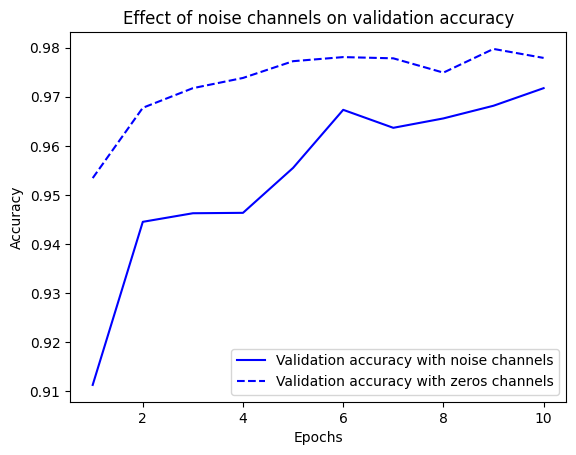

In [5]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### Versão PyTorch:

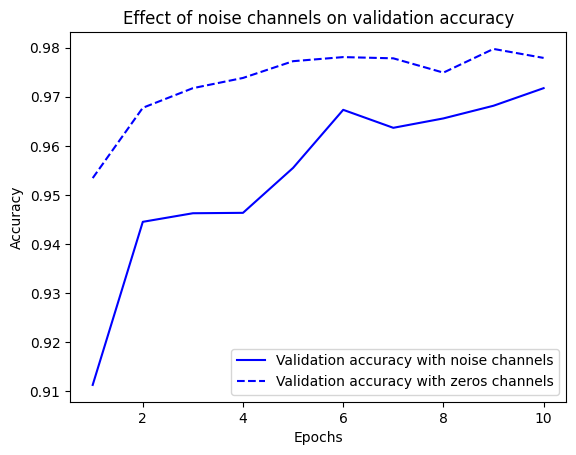

In [6]:
import matplotlib.pyplot as plt

epochs = range(1, len(val_acc_noise) + 1)
plt.plot(epochs, val_acc_noise, "b-", label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--", label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

### Versão Tensorflow:

In [7]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1030 - loss: 2.3306 - val_accuracy: 0.0993 - val_loss: 2.3058
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1214 - loss: 2.2962 - val_accuracy: 0.1038 - val_loss: 2.3098
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.1293 - loss: 2.2865 - val_accuracy: 0.1013 - val_loss: 2.3175
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1458 - loss: 2.2722 - val_accuracy: 0.1039 - val_loss: 2.3193
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.1584 - loss: 2.2567 - val_accuracy: 0.1076 - val_loss: 2.3336
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.1727 - loss: 2.2349 - val_accuracy: 0.1021 - val_loss: 2.3483
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.1889 - loss: 2.2097 - val_accuracy: 0.1049 - val_loss: 2.3642
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2026 - loss: 2.1819 - v

### Versão PyTorch:

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np

# Carregando MNIST
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root='.', train=True, download=True, transform=transform)
train_images = mnist.data.view(-1, 28*28).float() / 255
train_labels = mnist.targets

# Embaralhar os rótulos
random_train_labels = train_labels.clone()
random_train_labels = random_train_labels[torch.randperm(len(random_train_labels))]

# Criar dataset com rótulos embaralhados
dataset = TensorDataset(train_images, random_train_labels)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128)

# Definir modelo
class RandomLabelModel(nn.Module):
    def __init__(self):
        super(RandomLabelModel, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = RandomLabelModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters())

# Treinamento
for epoch in range(100):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1} concluída.")


Epoch 1 concluída.
Epoch 2 concluída.
Epoch 3 concluída.
Epoch 4 concluída.
Epoch 5 concluída.
Epoch 6 concluída.
Epoch 7 concluída.
Epoch 8 concluída.
Epoch 9 concluída.
Epoch 10 concluída.
Epoch 11 concluída.
Epoch 12 concluída.
Epoch 13 concluída.
Epoch 14 concluída.
Epoch 15 concluída.
Epoch 16 concluída.
Epoch 17 concluída.
Epoch 18 concluída.
Epoch 19 concluída.
Epoch 20 concluída.
Epoch 21 concluída.
Epoch 22 concluída.
Epoch 23 concluída.
Epoch 24 concluída.
Epoch 25 concluída.
Epoch 26 concluída.
Epoch 27 concluída.
Epoch 28 concluída.
Epoch 29 concluída.
Epoch 30 concluída.
Epoch 31 concluída.
Epoch 32 concluída.
Epoch 33 concluída.
Epoch 34 concluída.
Epoch 35 concluída.
Epoch 36 concluída.
Epoch 37 concluída.
Epoch 38 concluída.
Epoch 39 concluída.
Epoch 40 concluída.
Epoch 41 concluída.
Epoch 42 concluída.
Epoch 43 concluída.
Epoch 44 concluída.
Epoch 45 concluída.
Epoch 46 concluída.
Epoch 47 concluída.
Epoch 48 concluída.
Epoch 49 concluída.
Epoch 50 concluída.
Epoch 51 

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

### Versão Tensorflow:

In [10]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers

# Carregar o dataset
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

# Definir e compilar o modelo
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Treinar o modelo
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.4367 - loss: 3364.6167 - val_accuracy: 0.2442 - val_loss: 2.4858
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.2169 - loss: 2.8412 - val_accuracy: 0.2411 - val_loss: 2.1878
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.2200 - loss: 2.3442 - val_accuracy: 0.2005 - val_loss: 2.3859
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.2154 - loss: 2.3919 - val_accuracy: 0.2164 - val_loss: 2.1707
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.2174 - loss: 2.5001 - val_accuracy: 0.2021 - val_loss: 2.3311
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2088 - loss: 2.3331 - val_accuracy: 0.2323 - val_loss: 2.1514
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.2208 - loss: 2.4367 - val_accuracy: 0.2375 - val_loss: 2.1971
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.2118 - loss: 2.1498 - val_a

### Versão PyTorch:

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split, TensorDataset

# Carregar o dataset MNIST (normalizado e achatado)
transform = transforms.Compose([
    transforms.ToTensor(),  # Transforma em tensor (C, H, W)
    transforms.Lambda(lambda x: x.view(-1))  # Achata para vetor de 784
])

mnist_dataset = datasets.MNIST(root='.', train=True, download=True, transform=transform)

# Divide em treino e validação (80% treino, 20% validação)
train_size = int(0.8 * len(mnist_dataset))
val_size = len(mnist_dataset) - train_size
train_dataset, val_dataset = random_split(mnist_dataset, [train_size, val_size])

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128)

# Definir o modelo
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        return self.fc2(x)

model = SimpleNN()

# Função de perda e otimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters(), lr=1.0)

# Treinamento
for epoch in range(10):
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Avaliação no conjunto de validação
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    print(f"Epoch {epoch+1}, Val Accuracy: {accuracy:.4f}")


Epoch 1, Val Accuracy: 0.4456
Epoch 2, Val Accuracy: 0.2817
Epoch 3, Val Accuracy: 0.2481
Epoch 4, Val Accuracy: 0.2150
Epoch 5, Val Accuracy: 0.2425
Epoch 6, Val Accuracy: 0.1940
Epoch 7, Val Accuracy: 0.2031
Epoch 8, Val Accuracy: 0.1772
Epoch 9, Val Accuracy: 0.2195
Epoch 10, Val Accuracy: 0.1650


**The same model with a more appropriate learning rate**

### Versão Tensorflow:

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8298 - loss: 0.9353 - val_accuracy: 0.9592 - val_loss: 0.1426
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9642 - loss: 0.1264 - val_accuracy: 0.9452 - val_loss: 0.1965
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9743 - loss: 0.0913 - val_accuracy: 0.9648 - val_loss: 0.1634
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9801 - loss: 0.0741 - val_accuracy: 0.9701 - val_loss: 0.1634
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.9833 - loss: 0.0669 - val_accuracy: 0.9733 - val_loss: 0.1686
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9868 - loss: 0.0539 - val_accuracy: 0.9718 - val_loss: 0.1576
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9886 - loss: 0.0437 - val_accuracy: 0.9723 - val_loss: 0.1853
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9893 - loss: 0.0453 - val_acc

### Versão PyTorch:

In [13]:
import torch.nn as nn
import torch.optim as optim

# Definição do modelo
model = nn.Sequential(
    nn.Linear(28*28, 512),  # assumindo entrada 28x28
    nn.ReLU(),
    nn.Linear(512, 10),
    nn.Softmax(dim=1)
)

# Otimizador e função de perda
optimizer = optim.RMSprop(model.parameters(), lr=1e-2)
criterion = nn.CrossEntropyLoss()

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

### Versão Tensorflow:

In [14]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7408 - loss: 1.0338 - val_accuracy: 0.9021 - val_loss: 0.3592
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9004 - loss: 0.3667 - val_accuracy: 0.9123 - val_loss: 0.3100
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9115 - loss: 0.3208 - val_accuracy: 0.9192 - val_loss: 0.2915
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9153 - loss: 0.3104 - val_accuracy: 0.9206 - val_loss: 0.2840
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9176 - loss: 0.2947 - val_accuracy: 0.9226 - val_loss: 0.2785
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9203 - loss: 0.2893 - val_accuracy: 0.9250 - val_loss: 0.2739
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9235 - loss: 0.2753 - val_accuracy: 0.9261 - val_loss: 0.2715
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9225 - loss: 0.2758 - val_accuracy: 0.

### Versão PyTorch:

In [15]:
import torch.nn as nn
import torch.optim as optim

# Modelo — sem Softmax aqui, porque CrossEntropyLoss já aplica internamente
model = nn.Sequential(
    nn.Linear(784, 10)  # assumindo imagens 28x28 achatadas
)

# Otimizador e função de perda
optimizer = optim.RMSprop(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# O model.fit(...) não tem equivalente direto no PyTorch e precisa ser implementado com loop de treinamento

### Versão Tensorflow:

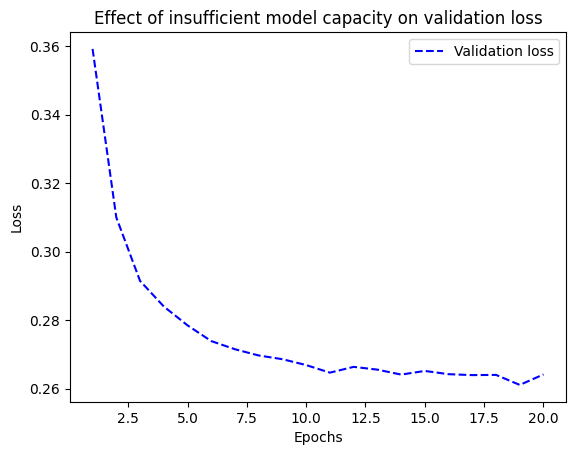

In [16]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

### Versão PyTorch:

Epoch 1, Val Loss: 0.7159
Epoch 2, Val Loss: 0.6934
Epoch 3, Val Loss: 0.6952
Epoch 4, Val Loss: 0.6933
Epoch 5, Val Loss: 0.6992
Epoch 6, Val Loss: 0.6932
Epoch 7, Val Loss: 0.7183
Epoch 8, Val Loss: 0.6993
Epoch 9, Val Loss: 0.6934
Epoch 10, Val Loss: 0.6934
Epoch 11, Val Loss: 0.6931
Epoch 12, Val Loss: 0.6950
Epoch 13, Val Loss: 0.6932
Epoch 14, Val Loss: 0.6980
Epoch 15, Val Loss: 0.6937
Epoch 16, Val Loss: 0.7238
Epoch 17, Val Loss: 0.6932
Epoch 18, Val Loss: 0.6935
Epoch 19, Val Loss: 0.6932
Epoch 20, Val Loss: 0.6932


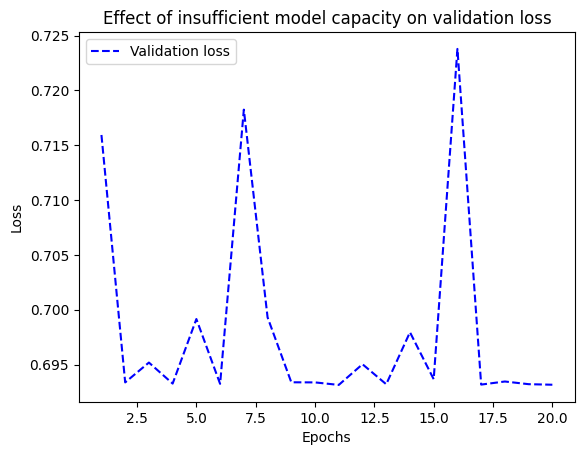

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

# Simulando os dados vetorizados (como na vetorização do IMDB)
train_data = np.random.rand(20000, 10000)
train_labels = np.random.randint(0, 2, size=(20000,))

# Separando treino e validação (validation_split=0.2)
split = int(0.8 * len(train_data))
train_inputs = torch.tensor(train_data[:split], dtype=torch.float32)
train_targets = torch.tensor(train_labels[:split], dtype=torch.float32)

val_inputs = torch.tensor(train_data[split:], dtype=torch.float32)
val_targets = torch.tensor(train_labels[split:], dtype=torch.float32)

# Criando os DataLoaders
train_dataset = TensorDataset(train_inputs, train_targets)
val_dataset = TensorDataset(val_inputs, val_targets)

train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=512)

# Definindo o modelo com PyTorch
model = nn.Sequential(
    nn.Linear(10000, 16),
    nn.ReLU(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.Sigmoid()
)

optimizer = optim.RMSprop(model.parameters(), lr=0.001)
criterion = nn.BCELoss()

val_loss_list = []

# Loop de treino e validação
for epoch in range(20):
    model.train()
    for inputs, labels in train_loader:
        outputs = model(inputs).squeeze()
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validação
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()

    avg_val_loss = running_val_loss / len(val_loader)
    val_loss_list.append(avg_val_loss)
    print(f"Epoch {epoch+1}, Val Loss: {avg_val_loss:.4f}")

# Plotando a curva de validação
epochs = range(1, 21)
plt.plot(epochs, val_loss_list, "b--", label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


### Versão Tensorflow:

In [19]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8304 - loss: 0.6251 - val_accuracy: 0.9421 - val_loss: 0.1950
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9450 - loss: 0.1840 - val_accuracy: 0.9572 - val_loss: 0.1413
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9659 - loss: 0.1172 - val_accuracy: 0.9660 - val_loss: 0.1113
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9739 - loss: 0.0914 - val_accuracy: 0.9689 - val_loss: 0.1021
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9796 - loss: 0.0706 - val_accuracy: 0.9704 - val_loss: 0.0996
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9821 - loss: 0.0592 - val_accuracy: 0.9743 - val_loss: 0.0906
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9853 - loss: 0.0478 - val_accuracy: 0.9739 - val_loss: 0.0912
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9882 - loss: 0.0389 - val_accuracy: 0.

### Versão PyTorch:

In [20]:
import torch.nn as nn
import torch.optim as optim

# Definindo o modelo
model = nn.Sequential(
    nn.Linear(784, 96),  # assumindo imagens 28x28 achatadas
    nn.ReLU(),
    nn.Linear(96, 96),
    nn.ReLU(),
    nn.Linear(96, 10)  # sem Softmax aqui
)

# Otimizador e função de perda
optimizer = optim.RMSprop(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# O treinamento (fit) deve ser feito manualmente com loops em PyTorch
# Aqui só estamos traduzindo o modelo e a configuração

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

### Versão Tensorflow:

In [21]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.6698 - loss: 0.6149 - val_accuracy: 0.8494 - val_loss: 0.4268
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.8855 - loss: 0.3614 - val_accuracy: 0.8803 - val_loss: 0.3266
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9211 - loss: 0.2587 - val_accuracy: 0.8724 - val_loss: 0.3158
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.9326 - loss: 0.2070 - val_accuracy: 0.8917 - val_loss: 0.2763
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9442 - loss: 0.1738 - val_accuracy: 0.8851 - val_loss: 0.2874
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9545 - loss: 0.1448 - val_accuracy: 0.8863 - val_loss: 0.2886
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9634 - loss: 0.1196 - val_accuracy: 0.8805 - val_loss: 0.3126
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accurac

### Versão PyTorch:

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from keras.datasets import imdb

# Carregar dados
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

# Vetorização
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

train_data = vectorize_sequences(train_data)
train_labels = np.asarray(train_labels).astype("float32")

# Converter para tensores PyTorch
train_data = torch.tensor(train_data, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.float32)

# Definir modelo
model = nn.Sequential(
    nn.Linear(10000, 16),
    nn.ReLU(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.Sigmoid()
)

# Compilar modelo (definir otimizador e perda)
optimizer = optim.RMSprop(model.parameters(), lr=0.001)
criterion = nn.BCELoss()  # Binary Crossentropy

**Version of the model with lower capacity**

### Versão Tensorflow:

In [27]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.4986 - loss: 0.8292 - val_accuracy: 0.5024 - val_loss: 0.6931
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.4970 - loss: 0.6932 - val_accuracy: 0.5021 - val_loss: 0.6931
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.5030 - loss: 0.6931 - val_accuracy: 0.5021 - val_loss: 0.6931
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.5088 - loss: 0.6930 - val_accuracy: 0.5021 - val_loss: 0.6931
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5023 - val_loss: 0.6932
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.5080 - loss: 0.6930 - val_accuracy: 0.5024 - val_loss: 0.6932
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.5095 - loss: 0.6930 - val_accuracy: 0.5024 - val_loss: 0.6932
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5124 - loss: 0.6929 - val_accuracy: 0.5024 - v

### Versão PyTorch:

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Convertendo os dados
train_data_tensor = torch.tensor(train_data, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_labels, dtype=torch.float32)

# Dividindo dados com validation_split=0.4
split = int(len(train_data_tensor) * 0.6)
train_inputs = train_data_tensor[:split]
train_targets = train_labels_tensor[:split]
val_inputs = train_data_tensor[split:]
val_targets = train_labels_tensor[split:]

# DataLoaders
train_loader = DataLoader(TensorDataset(train_inputs, train_targets), batch_size=512, shuffle=True)
val_loader = DataLoader(TensorDataset(val_inputs, val_targets), batch_size=512)

# Modelo
model = nn.Sequential(
    nn.Linear(train_data.shape[1], 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

# Otimizador e função de perda
optimizer = optim.RMSprop(model.parameters(), lr=0.001)
criterion = nn.BCELoss()

# Treinamento simples (sem acurácia nem histórico completo)
for epoch in range(20):
    model.train()
    for inputs, labels in train_loader:
        outputs = model(inputs).squeeze()
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

**Version of the model with higher capacity**

### Versão Tensorflow:

In [29]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 428ms/step - accuracy: 0.5090 - loss: 8.3148 - val_accuracy: 0.5024 - val_loss: 0.7224
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 387ms/step - accuracy: 0.5111 - loss: 0.7285 - val_accuracy: 0.5024 - val_loss: 0.6947
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 347ms/step - accuracy: 0.4892 - loss: 0.6966 - val_accuracy: 0.4976 - val_loss: 0.6980
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 296ms/step - accuracy: 0.5011 - loss: 0.6956 - val_accuracy: 0.5026 - val_loss: 0.6931
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 415ms/step - accuracy: 0.5060 - loss: 0.6931 - val_accuracy: 0.5025 - val_loss: 0.6931
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 345ms/step - accuracy: 0.5125 - loss: 0.6930 - val_accuracy: 0.5024 - val_loss: 0.6934
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 311ms/step - accuracy: 0.5167 - loss: 0.6937 - val_accuracy: 0.5020 - val_loss: 0.6931
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 290ms/step - accuracy: 0.5057 - loss: 0.6932 - val_accuracy:

### Versão PyTorch:

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Convertendo os dados para tensores
train_data_tensor = torch.tensor(train_data, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_labels, dtype=torch.float32)

# Separando em treino e validação (validation_split=0.4)
split = int(len(train_data_tensor) * 0.6)
train_inputs = train_data_tensor[:split]
train_targets = train_labels_tensor[:split]
val_inputs = train_data_tensor[split:]
val_targets = train_labels_tensor[split:]

# DataLoaders
train_loader = DataLoader(TensorDataset(train_inputs, train_targets), batch_size=512, shuffle=True)
val_loader = DataLoader(TensorDataset(val_inputs, val_targets), batch_size=512)

# Modelo
model = nn.Sequential(
    nn.Linear(train_data.shape[1], 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, 1),
    nn.Sigmoid()
)

# Otimizador e função de perda
optimizer = optim.RMSprop(model.parameters(), lr=0.001)
criterion = nn.BCELoss()

# Treinamento
for epoch in range(20):
    model.train()
    for inputs, labels in train_loader:
        outputs = model(inputs).squeeze()
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

#### Adding weight regularization

**Adding L2 weight regularization to the model**

### Versão Tensorflow:

In [31]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.4922 - loss: 1.6475 - val_accuracy: 0.4976 - val_loss: 0.7979
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.4989 - loss: 0.7916 - val_accuracy: 0.4976 - val_loss: 0.7601
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.4966 - loss: 0.7560 - val_accuracy: 0.5024 - val_loss: 0.7446
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5044 - loss: 0.7409 - val_accuracy: 0.5024 - val_loss: 0.7305
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.5033 - loss: 0.7275 - val_accuracy: 0.5024 - val_loss: 0.7196
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.5069 - loss: 0.7173 - val_accuracy: 0.5024 - val_loss: 0.7121
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5013 - loss: 0.7107 - val_accuracy: 0.5024 - val_loss: 0.7070
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.5064 - loss: 0.7059 - val_accuracy: 0.5024 - v

### Versão PyTorch:

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Convertendo os dados
train_data_tensor = torch.tensor(train_data, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_labels, dtype=torch.float32)

# Separando treino e validação (validation_split = 0.4)
split = int(len(train_data_tensor) * 0.6)
train_inputs = train_data_tensor[:split]
train_targets = train_labels_tensor[:split]
val_inputs = train_data_tensor[split:]
val_targets = train_labels_tensor[split:]

# DataLoaders
train_loader = DataLoader(TensorDataset(train_inputs, train_targets), batch_size=512, shuffle=True)
val_loader = DataLoader(TensorDataset(val_inputs, val_targets), batch_size=512)

# Modelo
model = nn.Sequential(
    nn.Linear(train_data.shape[1], 16),
    nn.ReLU(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.Sigmoid()
)

# Função de perda
criterion = nn.BCELoss()

# Otimizador com regularização L2 (weight decay)
optimizer = optim.RMSprop(model.parameters(), lr=0.001, weight_decay=0.002)

# Treinamento
for epoch in range(20):
    model.train()
    for inputs, labels in train_loader:
        outputs = model(inputs).squeeze()
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


**Different weight regularizers available in Keras**

### Versão Tensorflow:

In [33]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

### Versão PyTorch:

In [34]:
import torch

# Exemplo de cálculo L1
def l1_penalty(model, lambda_l1=0.001):
    l1_loss = 0.0
    for param in model.parameters():
        l1_loss += torch.sum(torch.abs(param))
    return lambda_l1 * l1_loss

# Exemplo de L1 + L2 (L2 com weight_decay no otimizador)
def l1_l2_penalty(model, lambda_l1=0.001):
    l1_loss = 0.0
    for param in model.parameters():
        l1_loss += torch.sum(torch.abs(param))
    return lambda_l1 * l1_loss

# L2 = weight_decay no otimizador
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001, weight_decay=0.001)


#### Adding dropout

**Adding dropout to the IMDB model**

### Versão Tensorflow:

In [35]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.4976 - loss: 1.1529 - val_accuracy: 0.5024 - val_loss: 0.6931
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.5106 - loss: 0.6931 - val_accuracy: 0.5024 - val_loss: 0.6931
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.5017 - loss: 0.6939 - val_accuracy: 0.5024 - val_loss: 0.6931
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5092 - loss: 0.6930 - val_accuracy: 0.5024 - val_loss: 0.6931
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5078 - loss: 0.6931 - val_accuracy: 0.5024 - val_loss: 0.6931
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.5074 - loss: 0.6931 - val_accuracy: 0.5024 - val_loss: 0.6932
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5070 - loss: 0.6931 - val_accuracy: 0.5024 - val_loss: 0.6932
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5147 - loss: 0.6929 - val_accuracy: 0.5024 - v

### Versão PyTorch:

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Convertendo os dados
train_data_tensor = torch.tensor(train_data, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_labels, dtype=torch.float32)

# Separando treino/validação (validation_split = 0.4)
split = int(len(train_data_tensor) * 0.6)
train_inputs = train_data_tensor[:split]
train_targets = train_labels_tensor[:split]
val_inputs = train_data_tensor[split:]
val_targets = train_labels_tensor[split:]

# DataLoaders
train_loader = DataLoader(TensorDataset(train_inputs, train_targets), batch_size=512, shuffle=True)
val_loader = DataLoader(TensorDataset(val_inputs, val_targets), batch_size=512)

# Modelo com Dropout
class DropoutModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

model = DropoutModel(train_data.shape[1])

# Otimizador e função de perda
criterion = nn.BCELoss()
optimizer = optim.RMSprop(model.parameters(), lr=0.001)

# Histórico
history_dropout = {
    'loss': [],
    'val_loss': [],
    'accuracy': [],
    'val_accuracy': []
}

# Treinamento com avaliação
for epoch in range(20):
    model.train()
    running_loss = 0.0
    running_acc = 0.0
    for inputs, labels in train_loader:
        outputs = model(inputs).squeeze()
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        preds = (outputs >= 0.5).float()
        running_acc += (preds == labels).float().mean().item()

    history_dropout['loss'].append(running_loss / len(train_loader))
    history_dropout['accuracy'].append(running_acc / len(train_loader))

    # Validação
    model.eval()
    val_loss = 0.0
    val_acc = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            preds = (outputs >= 0.5).float()
            val_acc += (preds == labels).float().mean().item()

    history_dropout['val_loss'].append(val_loss / len(val_loader))
    history_dropout['val_accuracy'].append(val_acc / len(val_loader))

    print(f"Epoch {epoch+1} - loss: {history_dropout['loss'][-1]:.4f} - acc: {history_dropout['accuracy'][-1]:.4f} - val_loss: {history_dropout['val_loss'][-1]:.4f} - val_acc: {history_dropout['val_accuracy'][-1]:.4f}")


Epoch 1 - loss: 1.2401 - acc: 0.5023 - val_loss: 0.6931 - val_acc: 0.5026
Epoch 2 - loss: 0.6938 - acc: 0.5002 - val_loss: 0.6932 - val_acc: 0.5026
Epoch 3 - loss: 0.6934 - acc: 0.5036 - val_loss: 0.6932 - val_acc: 0.5026
Epoch 4 - loss: 0.6931 - acc: 0.5077 - val_loss: 0.6932 - val_acc: 0.5026
Epoch 5 - loss: 0.6935 - acc: 0.5084 - val_loss: 0.6932 - val_acc: 0.5026
Epoch 6 - loss: 0.6937 - acc: 0.5008 - val_loss: 0.6932 - val_acc: 0.5026
Epoch 7 - loss: 0.6934 - acc: 0.5023 - val_loss: 0.6932 - val_acc: 0.5026
Epoch 8 - loss: 0.6934 - acc: 0.5027 - val_loss: 0.6932 - val_acc: 0.5026
Epoch 9 - loss: 0.6934 - acc: 0.5060 - val_loss: 0.6932 - val_acc: 0.5026
Epoch 10 - loss: 0.6934 - acc: 0.4991 - val_loss: 0.6932 - val_acc: 0.5026
Epoch 11 - loss: 0.6931 - acc: 0.5036 - val_loss: 0.6932 - val_acc: 0.5026
Epoch 12 - loss: 0.6935 - acc: 0.4996 - val_loss: 0.6932 - val_acc: 0.5026
Epoch 13 - loss: 0.6934 - acc: 0.5030 - val_loss: 0.6932 - val_acc: 0.5026
Epoch 14 - loss: 0.6934 - acc: 0.4

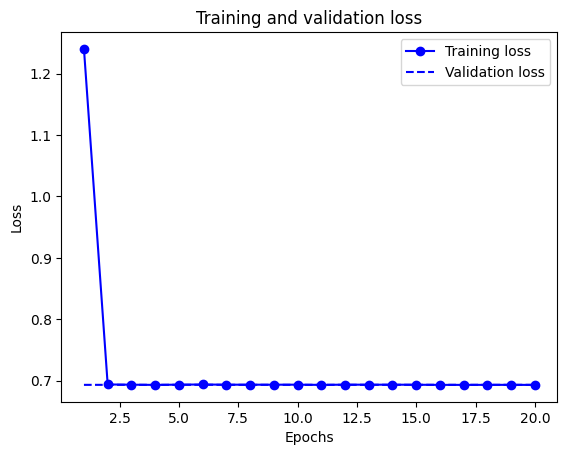

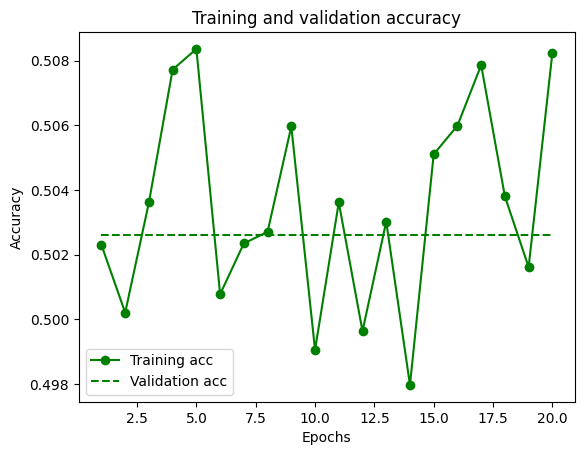

In [37]:
epochs = range(1, 21)

plt.plot(epochs, history_dropout['loss'], 'bo-', label='Training loss')
plt.plot(epochs, history_dropout['val_loss'], 'b--', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, history_dropout['accuracy'], 'go-', label='Training acc')
plt.plot(epochs, history_dropout['val_accuracy'], 'g--', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Summary